<a href="https://colab.research.google.com/github/Somali2424/Loan_Default_Prediction/blob/main/Default_Prediction_in_Loans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd, numpy as np, plotly.express as px, matplotlib.pyplot as plt, seaborn as sns

In [2]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


# EXPLORATORY DATA ANALYSIS

In [3]:
df=pd.read_csv('Default_Fin.csv')
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


We've got a dataset with 10,000 pieces of information that can help us determine if a person is likely to fail to repay a loan or not. This dataset includes four key factors: employment status, bank balance when the data was collected, annual salary, and a binary indicator for loan default (0 for 'defaulted' and 1 for 'not defaulted'). This information is crucial for a financial organization when deciding whether to grant a loan to an individual. That's why this project is so important

# New Section

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Checking if there is any null value
df.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [6]:
#Renaming target variable
df.rename({'Defaulted?':'Defaulted'},axis=1,inplace=True)
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


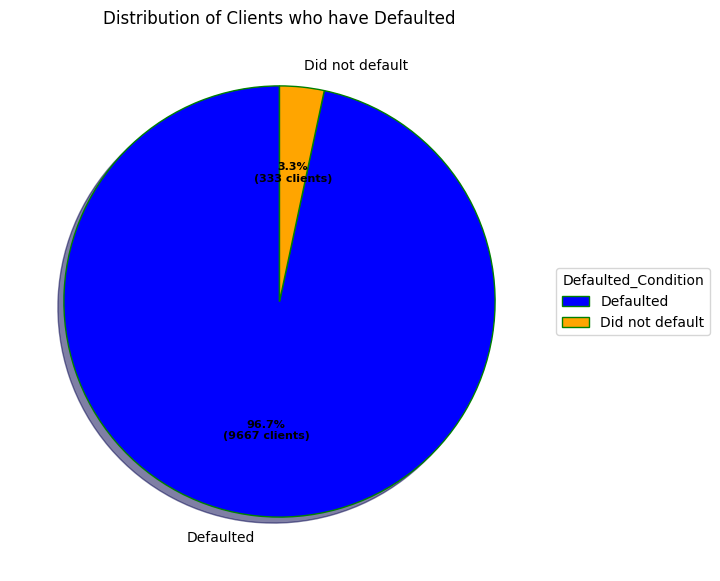

In [7]:
Condition = ['Defaulted', 'Did not default']

data = df['Defaulted'].value_counts()

# Creating color parameters
colors = ( "blue", "orange")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} clients)".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  labels = Condition,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

# Adding legend
ax.legend(wedges, Condition,
          title ="Defaulted_Condition",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Distribution of Clients who have Defaulted")

# show plot
plt.show()

It is possible to see most of the clients did not default on their loans.This means we are going have a class imbalance issue. We will resolve the issue while building the predictor model with AutoML


Let's separate our clients among those who are employed and those who are unemployed and see how the target variable is distributed among each separate group

In [8]:
#Separating into two groups: Employed clients and unemployed clients

In [9]:
employed = df.query("Employed == 1")
unemployed = df.query("Employed == 0")

Then after separating the groups we are again seeing the class balance between two groups. First the class balance is seen within the employed individual and then in the unemployed individuals. Running the above code divides the entire dataset into two parts.. two new dataframes are created, one is named 'employed' dataframe and other is named 'unemployed' dataframe. In unemployed dataframe the 'employed' column only contains value 0....The colummn name itself doesnot changed. Unemployed is only the name of the dataframe.

In [10]:
unemployed

,Index,Employed,Bank Balance,Annual Salary,Defaulted
1,2,0,9806.16,145273.56,0
5,6,0,11035.08,89898.72,0
7,8,0,9704.04,211205.40,0
10,11,0,0.00,262452.84,0
11,12,0,14646.96,159222.72,0
...,...,...,...,...,...
9980,9981,0,9240.24,164217.48,0
9986,9987,0,4815.96,183984.24,0
9989,9990,0,11991.36,240160.20,0
9994,9995,0,2068.92,179471.28,0


In [11]:
employed

,Index,Employed,Bank Balance,Annual Salary,Defaulted
0,1,1,8754.36,532339.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
6,7,1,9906.12,298862.76,0
...,...,...,...,...,...
9993,9994,1,11266.08,679601.40,0
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0


For employed individuals the class balance is:


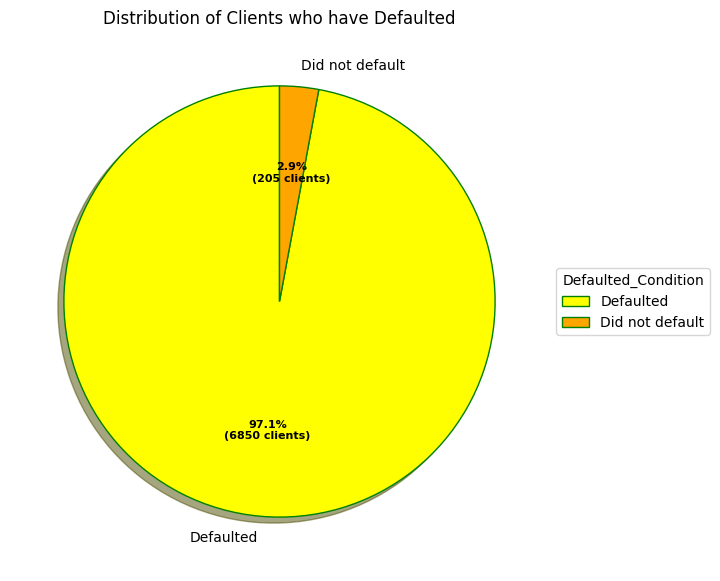

In [12]:
Condition = ['Defaulted', 'Did not default']

data = employed['Defaulted'].value_counts()

# Creating color parameters
colors = ( "yellow", "orange")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} clients)".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  labels = Condition,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

# Adding legend
ax.legend(wedges, Condition,
          title ="Defaulted_Condition",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Distribution of Clients who have Defaulted")

# show plot
plt.show()

For unemployed individuals the class balance is:

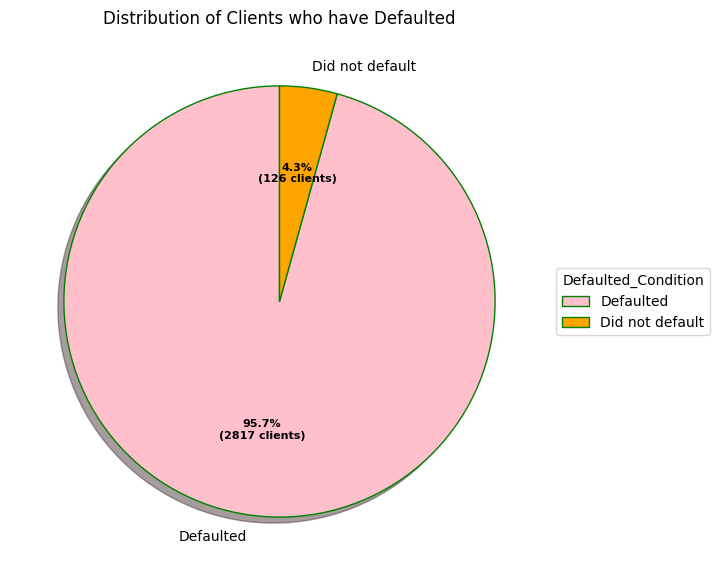

In [13]:
Condition = ['Defaulted', 'Did not default']

data = unemployed['Defaulted'].value_counts()

# Creating color parameters
colors = ( "pink", "orange")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} clients)".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  labels = Condition,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

# Adding legend
ax.legend(wedges, Condition,
          title ="Defaulted_Condition",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Distribution of Clients who have Defaulted")

# show plot
plt.show()

In [14]:
# The unemployed people have the tendency to default more than their employed counterpart

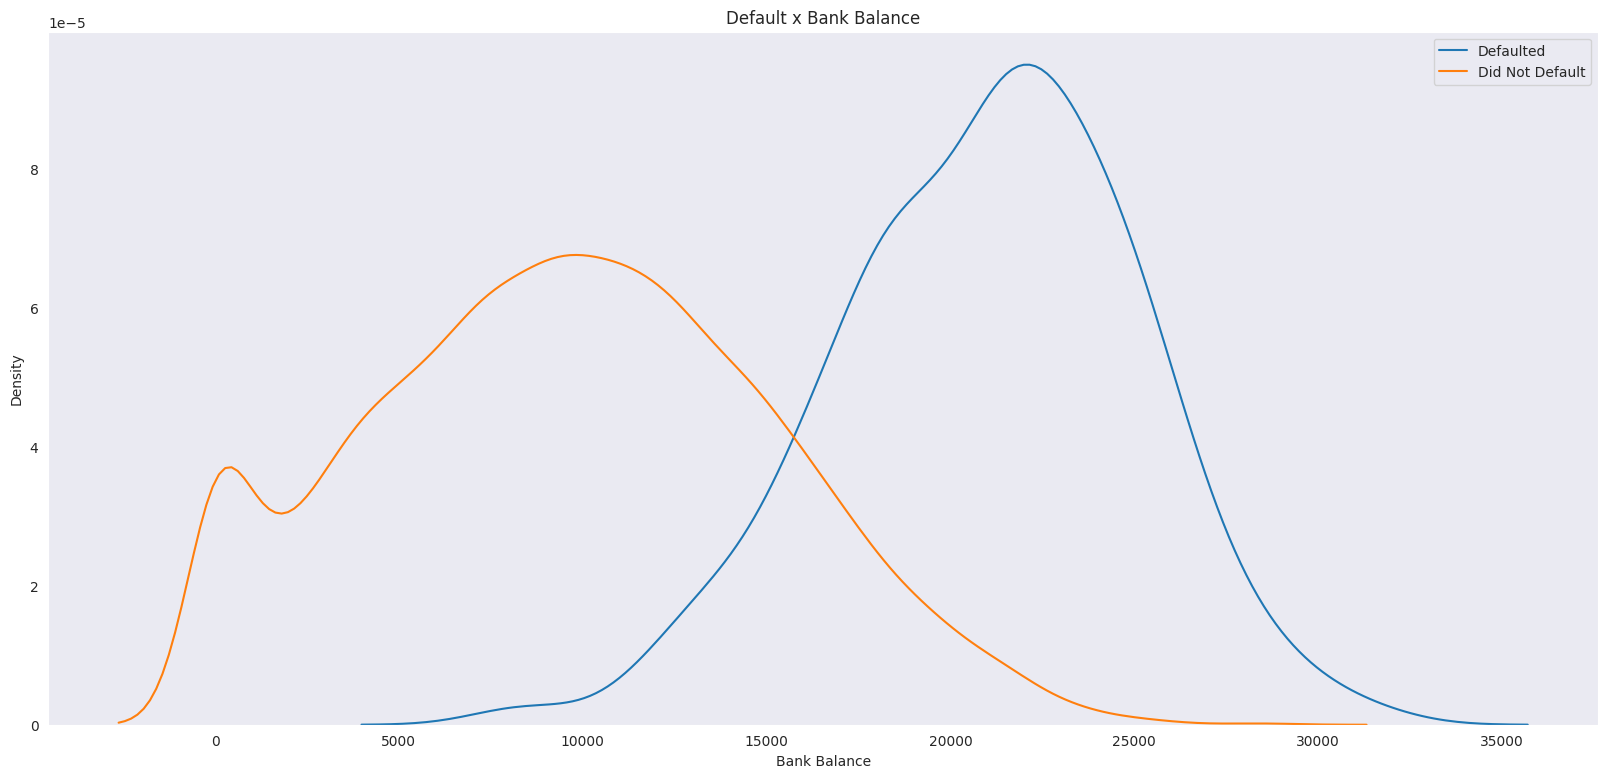

In [15]:
#Default distribution according to bank balance values
fig = plt.figure(figsize = (20, 9))
sns.set_style("dark")
sns.kdeplot(df.query('Defaulted==1')['Bank Balance'])
sns.kdeplot(df.query('Defaulted==0')['Bank Balance'])
plt.title('Default x Bank Balance')
plt.legend(labels=['Defaulted', 'Did Not Default'])
plt.show()

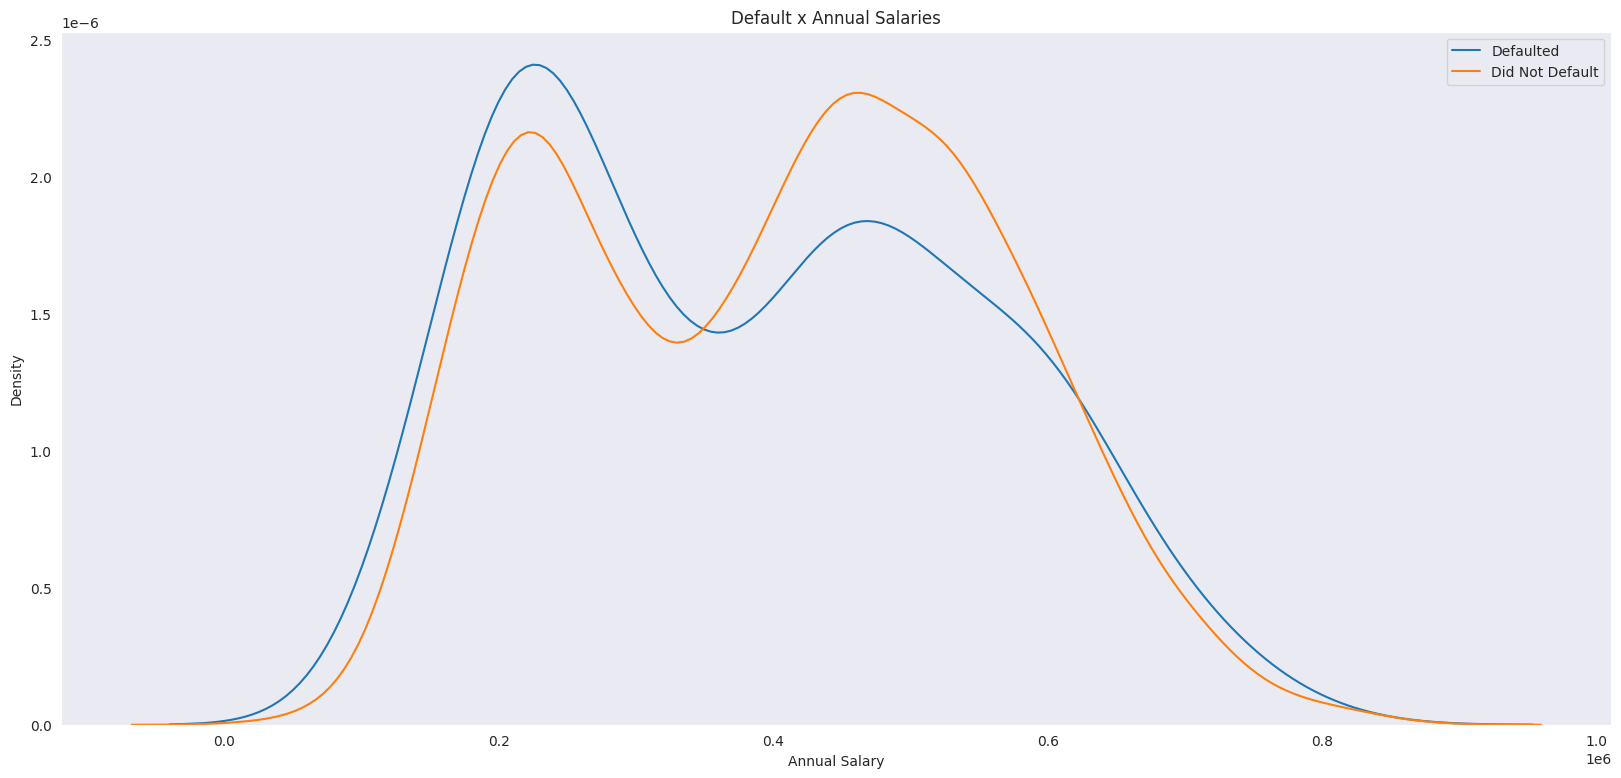

In [16]:
# Default distribution according to annual salaries
fig = plt.figure(figsize = (20, 9))
sns.set_style("dark")
sns.kdeplot(df[df['Defaulted']==1]['Annual Salary'])
sns.kdeplot(df[df['Defaulted']==0]['Annual Salary'])
plt.title('Default x Annual Salaries')
plt.legend(labels=['Defaulted', 'Did Not Default'])
plt.show()


There is a threshold below which the higher annual income group are more likely to default and above that threshold the higher income group are more likely to default

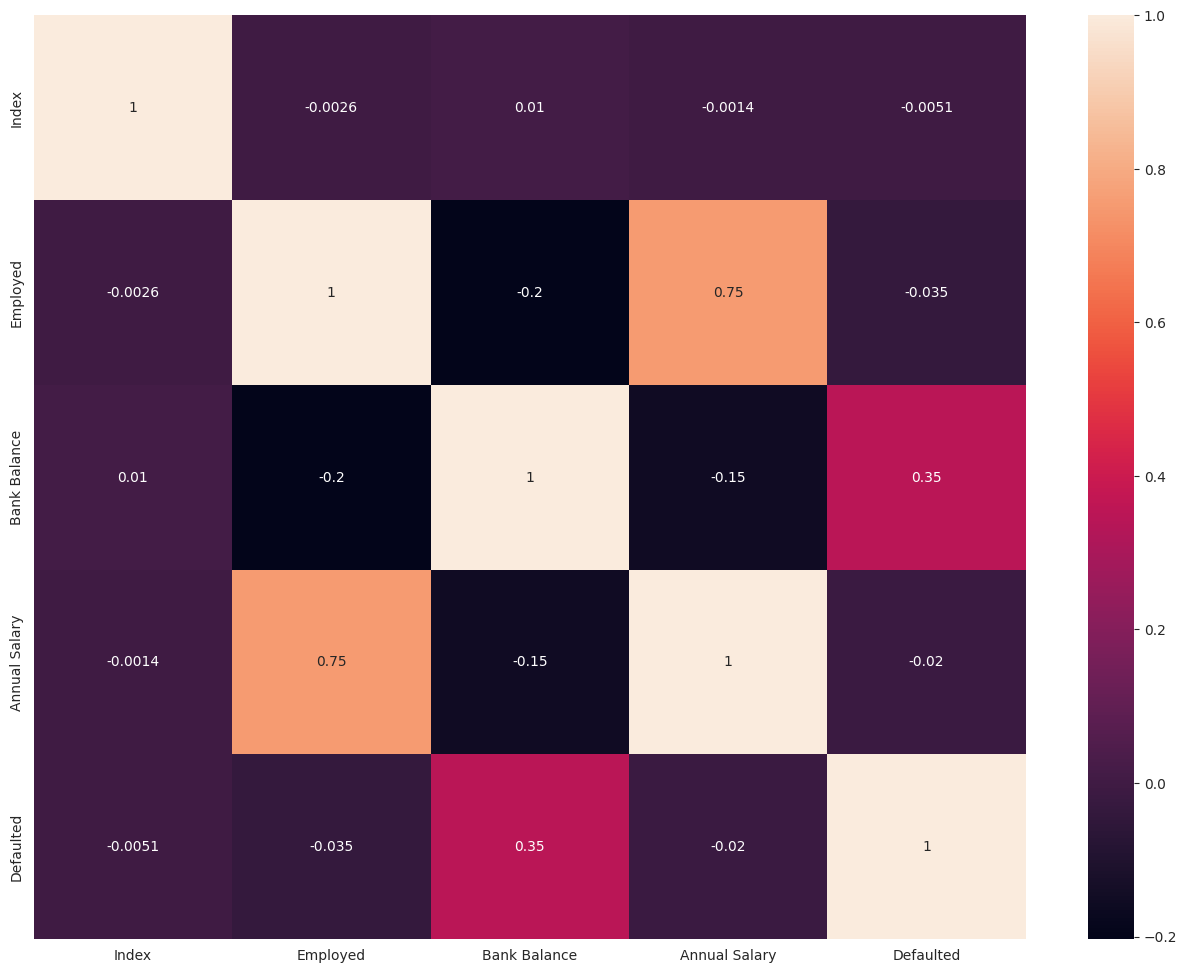

In [17]:
corr = df.corr()
plt.figure(figsize = (16, 12))
g = sns.heatmap(corr, annot = True)

we don't really have any strong correlation between the target variable and any other attribute. It may be because the correlation only shows the linear relationship among variables. Any other relationships are failed to capture by it

# Building a Model to Predict Loan Default

Here we are going to use is the recall score which is going to tell us how good our model can predict the class that it wants to predict..
Our model should be able to predict the customers who are more likely to predict..We want to keep our false negatives as low as possible. false negative implies the defaulters who had been tagged as defaulters by the model and more likely to increase financial loss in the institution

Lets divide our dataset into a Training Set and Testing set

In [18]:
test=df.tail(2000)
#20% of the dataset will be used for testing
test

,Index,Employed,Bank Balance,Annual Salary,Defaulted
8000,8001,1,3649.80,286403.28,0
8001,8002,1,4243.56,488241.12,0
8002,8003,1,15233.04,468121.80,0
8003,8004,0,4770.48,272530.44,0
8004,8005,1,7286.04,594569.64,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [19]:
#Removing  testing data from the dataframe and setting up 80% of data left for training and validation

In [20]:
train=df.drop(test.index)
train

,Index,Employed,Bank Balance,Annual Salary,Defaulted
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
7995,7996,1,8095.20,807347.40,0
7996,7997,1,13173.12,506747.64,0
7997,7998,1,7116.72,573451.20,0
7998,7999,1,14005.20,431426.28,0


Importing PyCaret's classification lib

In [26]:
pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 83.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.0 MB/s

In [29]:
from pycaret.classification import *


In [30]:
models()

ValueError: ignored

In [31]:
s = setup(train, target = 'Defaulted', train_size = 0.75,ignore_features = ['Index'],fix_imbalance = True,normalize = True)

,Description,Value
0,Session id,2038
1,Target,Defaulted
2,Target type,Binary
3,Original data shape,"(8000, 5)"
4,Transformed data shape,"(13602, 4)"
5,Transformed train set shape,"(11602, 4)"
6,Transformed test set shape,"(2000, 4)"
7,Ignore features,1
8,Numeric features,3
9,Preprocess,True


In [33]:
# Let's run a bunch of different classification algorithms and rank them by their recall score
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9668,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0460
xgboost,Extreme Gradient Boosting,0.9105,0.9203,0.7084,0.2291,0.3455,0.3109,0.3692,0.1610
et,Extra Trees Classifier,0.9098,0.9087,0.7034,0.2264,0.3421,0.3073,0.3653,0.5470
dt,Decision Tree Classifier,0.9087,0.7854,0.6534,0.2133,0.3213,0.2856,0.3381,0.0700
rf,Random Forest Classifier,0.9077,0.9097,0.7434,0.2274,0.3480,0.3131,0.3781,1.3300
lightgbm,Light Gradient Boosting Machine,0.9028,0.9326,0.7687,0.2234,0.3456,0.3101,0.3807,1.2120
gbc,Gradient Boosting Classifier,0.8993,0.9407,0.8287,0.2254,0.3542,0.3186,0.3998,1.1590
ada,Ada Boost Classifier,0.8948,0.9443,0.8489,0.2209,0.3503,0.3142,0.4003,0.3500
knn,K Neighbors Classifier,0.8923,0.8642,0.7737,0.2046,0.3233,0.2858,0.3622,0.0820
lr,Logistic Regression,0.8922,0.9528,0.8787,0.2204,0.3522,0.3159,0.4078,0.8660


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

there is a high cost associated with False Negative. So we sort our models based on the recall score..
We can see 3 models are showing high accuracy and recall score that is Dummy Classifier,ridge Classifier, Linear Discriminant Analysis




In [34]:
from sklearn.linear_model import RidgeClassifier


In [35]:
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, random_state=1350,
                solver='auto', tol=0.001)


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=1350, solver='auto',
                tol=0.001)

In [36]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8350,0.0000,0.7895,0.1364,0.2326,0.1887,0.2833
1,0.8400,0.0000,0.9000,0.1607,0.2727,0.2291,0.3400
2,0.8483,0.0000,0.8500,0.1619,0.2720,0.2288,0.3299
3,0.8600,0.0000,0.9500,0.1863,0.3115,0.2708,0.3856
4,0.8583,0.0000,0.9500,0.1845,0.3089,0.2681,0.3833
5,0.8567,0.0000,0.9000,0.1765,0.2951,0.2535,0.3609
6,0.8683,0.0000,0.9500,0.1959,0.3248,0.2853,0.3976
7,0.8333,0.0000,0.9500,0.1610,0.2754,0.2316,0.3519
8,0.8433,0.0000,0.9000,0.1636,0.2769,0.2337,0.3439


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [37]:
lda = create_model('lda')



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.9315,0.7895,0.1351,0.2308,0.1868,0.2815
1,0.8383,0.9591,0.9000,0.1593,0.2707,0.2269,0.3380
2,0.8483,0.9541,0.8500,0.1619,0.2720,0.2288,0.3299
3,0.8567,0.9667,0.9500,0.1827,0.3065,0.2654,0.3810
4,0.8583,0.9679,0.9500,0.1845,0.3089,0.2681,0.3833
5,0.8600,0.9300,0.9000,0.1800,0.3000,0.2588,0.3654
6,0.8700,0.9701,0.9500,0.1979,0.3276,0.2883,0.4002
7,0.8333,0.9402,0.9500,0.1610,0.2754,0.2316,0.3519
8,0.8433,0.9439,0.9000,0.1636,0.2769,0.2337,0.3439


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [38]:

qda = create_model('qda')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.9271,0.7368,0.1667,0.2718,0.2322,0.3111
1,0.8800,0.9535,0.9000,0.2045,0.3333,0.2950,0.3954
2,0.8733,0.9523,0.8500,0.1889,0.3091,0.2692,0.3640
3,0.8917,0.9638,0.9500,0.2289,0.3689,0.3331,0.4366
4,0.8867,0.9655,0.9500,0.2209,0.3585,0.3218,0.4275
5,0.8917,0.9342,0.9000,0.2222,0.3564,0.3201,0.4157
6,0.9017,0.9637,0.9500,0.2468,0.3918,0.3578,0.4562
7,0.8583,0.9347,0.8000,0.1649,0.2735,0.2310,0.3220
8,0.8767,0.9426,0.9000,0.2000,0.3273,0.2885,0.3900


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [39]:
# Blending models
blended_model = blend_models(estimator_list = [ridge, lda, qda],
                            fold = 10,
                            optimize = 'Recall',
                            choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8317,0.0000,0.7895,0.1339,0.2290,0.1849,0.2798
1,0.8367,0.0000,0.9000,0.1579,0.2687,0.2247,0.3361
2,0.8483,0.0000,0.8500,0.1619,0.2720,0.2288,0.3299
3,0.8600,0.0000,0.9500,0.1863,0.3115,0.2708,0.3856
4,0.8583,0.0000,0.9500,0.1845,0.3089,0.2681,0.3833
5,0.8567,0.0000,0.9000,0.1765,0.2951,0.2535,0.3609
6,0.8700,0.0000,0.9500,0.1979,0.3276,0.2883,0.4002
7,0.8350,0.0000,0.9000,0.1565,0.2667,0.2225,0.3342
8,0.8433,0.0000,0.9000,0.1636,0.2769,0.2337,0.3439


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the blended model, hence it will be returned. NOTE: The display metrics are for the blended model (not the original one).


No improvement made. Let's tune each one of our models.



In [40]:
tuned_ridge = tune_model(ridge,
                        n_iter = 1000,
                        optimize = 'Recall',
                        choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8317,0.0000,0.7895,0.1339,0.2290,0.1849,0.2798
1,0.8383,0.0000,0.9000,0.1593,0.2707,0.2269,0.3380
2,0.8500,0.0000,0.8500,0.1635,0.2742,0.2312,0.3319
3,0.8617,0.0000,0.9500,0.1881,0.3140,0.2736,0.3879
4,0.8567,0.0000,0.9500,0.1827,0.3065,0.2654,0.3810
5,0.8583,0.0000,0.9000,0.1782,0.2975,0.2561,0.3631
6,0.8700,0.0000,0.9500,0.1979,0.3276,0.2883,0.4002
7,0.8333,0.0000,0.9500,0.1610,0.2754,0.2316,0.3519
8,0.8433,0.0000,0.9000,0.1636,0.2769,0.2337,0.3439


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


In [51]:
import numpy

In [65]:
tuned_lda = tune_model(lda,
                        n_iter = 1000,
                       optimize = 'Recall',
                        choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8367,0.9544,0.8947,0.1504,0.2576,0.2150,0.3267
1,0.8483,0.9534,0.9000,0.1682,0.2835,0.2408,0.3501
2,0.8367,0.9484,0.8500,0.1518,0.2576,0.2131,0.3161
3,0.8433,0.9509,0.9500,0.1696,0.2879,0.2452,0.3638
4,0.8533,0.9613,0.9500,0.1792,0.3016,0.2601,0.3765
5,0.8500,0.9228,0.9000,0.1698,0.2857,0.2433,0.3522
6,0.8633,0.9615,1.0000,0.1961,0.3279,0.2882,0.4103
7,0.8250,0.9266,0.9000,0.1488,0.2553,0.2101,0.3232
8,0.8367,0.9276,0.9000,0.1579,0.2687,0.2247,0.3361


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 36 candidates, totalling 360 fits


In [42]:
tuned_qda = tune_model(qda,
                        n_iter = 1000,
                        optimize = 'Recall',

                        choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8350,0.9557,0.8947,0.1491,0.2556,0.2129,0.3249
1,0.8450,0.9527,0.9000,0.1651,0.2791,0.2360,0.3460
2,0.8367,0.9466,0.8500,0.1518,0.2576,0.2131,0.3161
3,0.8433,0.9516,0.9500,0.1696,0.2879,0.2452,0.3638
4,0.8500,0.9616,0.9500,0.1759,0.2969,0.2550,0.3722
5,0.8433,0.9207,0.9000,0.1636,0.2769,0.2337,0.3439
6,0.8600,0.9572,1.0000,0.1923,0.3226,0.2825,0.4055
7,0.8200,0.9228,0.9000,0.1452,0.2500,0.2043,0.3180
8,0.8333,0.9255,0.9000,0.1552,0.2647,0.2204,0.3323


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 101 candidates, totalling 1010 fits


All three models have almost the same recall score of 94..Tunedridge  has the best accuracy score 85%

In [43]:
predict_model(tuned_qda)
#Finally, let's use our model on the hold-out sample to see how well it performs




,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.8235,0.9422,0.9104,0.1495,0.2568,0.2115,0.3264


,Employed,Bank Balance,Annual Salary,Defaulted,prediction_label,prediction_score
3522,0,10956.599609,205674.953125,0,0,0.7316
6612,1,22066.439453,385552.093750,1,1,0.8395
1085,0,18981.480469,126450.359375,0,1,0.7875
5889,1,978.359985,490173.718750,0,0,0.9883
1239,1,17198.160156,500931.843750,0,1,0.6022
...,...,...,...,...,...,...
3109,0,8859.240234,168756.953125,0,0,0.8348
3159,0,17073.240234,168534.359375,0,1,0.6838
912,1,2251.199951,715932.000000,0,0,0.9817
6923,0,14801.400391,151037.765625,1,1,0.5363


In [44]:
predict_model(tuned_ridge)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8420,0.8822,0.9254,0.1662,0.2818,0.2386,0.3532


,Employed,Bank Balance,Annual Salary,Defaulted,prediction_label
3522,0,10956.599609,205674.953125,0,0
6612,1,22066.439453,385552.093750,1,1
1085,0,18981.480469,126450.359375,0,1
5889,1,978.359985,490173.718750,0,0
1239,1,17198.160156,500931.843750,0,1
...,...,...,...,...,...
3109,0,8859.240234,168756.953125,0,0
3159,0,17073.240234,168534.359375,0,1
912,1,2251.199951,715932.000000,0,0
6923,0,14801.400391,151037.765625,1,0


In [45]:
predict_model(tuned_lda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8285,0.9401,0.8955,0.1515,0.2592,0.2141,0.3259


,Employed,Bank Balance,Annual Salary,Defaulted,prediction_label,prediction_score
3522,0,10956.599609,205674.953125,0,0,0.7306
6612,1,22066.439453,385552.093750,1,1,0.8700
1085,0,18981.480469,126450.359375,0,1,0.8147
5889,1,978.359985,490173.718750,0,0,0.9898
1239,1,17198.160156,500931.843750,0,1,0.5921
...,...,...,...,...,...,...
3109,0,8859.240234,168756.953125,0,0,0.8354
3159,0,17073.240234,168534.359375,0,1,0.7075
912,1,2251.199951,715932.000000,0,0,0.9862
6923,0,14801.400391,151037.765625,1,1,0.5489


In [46]:
#Both Ridge Classifier and Linear Discriminant Analysis has the same accuracy level and Recall Value but Linear Discriminant Analysis has a better discriminatory abilities as per the AUC values

In [47]:
#Finalizing model before testing it with unseen data
model = finalize_model(tuned_lda)
print(model) # Printing final model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Employed', 'Bank Balance',
                                             'Annual Salary'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('categorical_imputer',
                 TransformerWrapper(exc...
                                    transformer=StandardScaler(copy=True,
        

In [66]:
lda_classifier = LinearDiscriminantAnalysis(
    priors=None,
    store_covariance=False  # Set to True or False as per your requirement
)


NameError: ignored

In [67]:
test # testing set


,Index,Employed,Bank Balance,Annual Salary,Defaulted
8000,8001,1,3649.80,286403.28,0
8001,8002,1,4243.56,488241.12,0
8002,8003,1,15233.04,468121.80,0
8003,8004,0,4770.48,272530.44,0
8004,8005,1,7286.04,594569.64,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [68]:
predictions = predict_model(model, data = test)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8315,0.9307,0.8657,0.1503,0.2561,0.2110,0.3173


In [69]:
predictions


,Index,Employed,Bank Balance,Annual Salary,Defaulted,prediction_label,prediction_score
8000,8001,1,3649.800049,286403.281250,0,0,0.9744
8001,8002,1,4243.560059,488241.125000,0,0,0.9712
8002,8003,1,15233.040039,468121.812500,0,0,0.5458
8003,8004,0,4770.479980,272530.437500,0,0,0.9494
8004,8005,1,7286.040039,594569.625000,0,0,0.9326
...,...,...,...,...,...,...,...
9995,9996,1,8538.719727,635908.562500,0,0,0.9055
9996,9997,1,9095.519531,235928.640625,0,0,0.8781
9997,9998,1,10144.919922,703633.937500,0,0,0.8573
9998,9999,1,18828.119141,440029.312500,0,1,0.7137


In [70]:
y_test = predictions['Defaulted']
pred = predictions['prediction_label']

In [71]:
y_test.value_counts()


0    1933
1      67
Name: Defaulted, dtype: int64

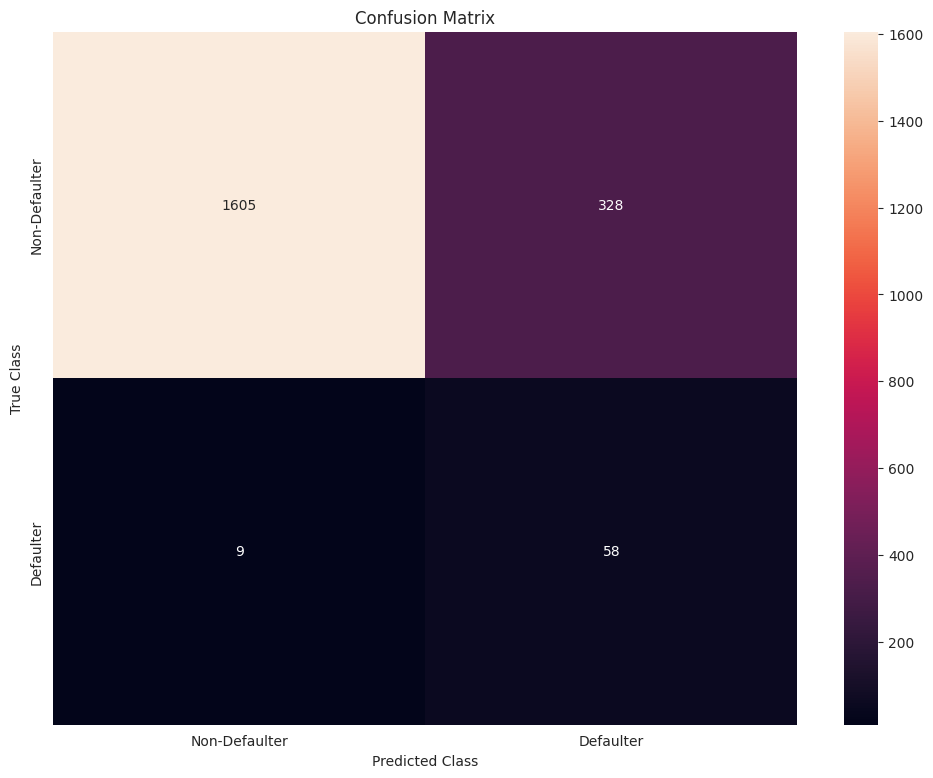

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12,9))
ax = plt.subplot()
sns.heatmap(cm,annot = True, fmt ='g', ax = ax)
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Non-Defaulter','Defaulter'])
ax.yaxis.set_ticklabels(['Non-Defaulter','Defaulter'])
plt.show()

Considering that labeling a defaulter as a non-defaulter represents a high chance of financial loss to the institution, the goal of this model was to have the highest recall possible and correctly predict the highest amount of defaulters as possible.

Through an AutoML library called PyCaret, we could successfully run 16 different classification algorithms and find the one with the best recall performance. After tuning it and testing it, we've achieved a 89.55% recall score on unseen data and correctly predicted 61 defaulters among 60 of them.




# New Section